### Use sciann kernel

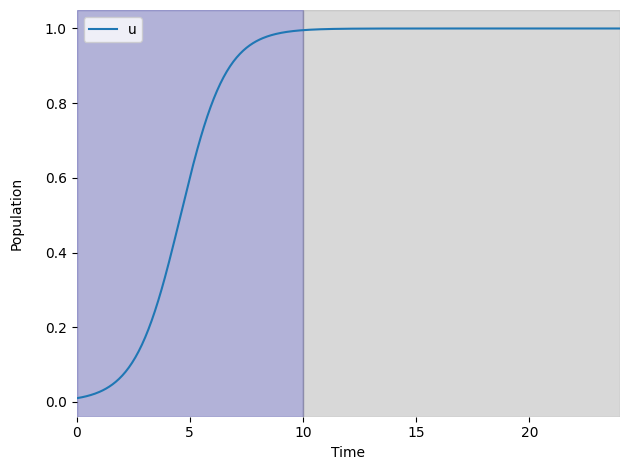

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE model
def ode_model(u, t, C):
    return u*(C-u)

def ode_solver(t, initial_cond, params):
    initu = initial_cond
    C = params
    res = odeint(ode_model, initu, t, args=(C,))
    return res

def solveDE(initu, C, tend):
    initial_cond = [initu]
    params = [C]
    tspan = np.arange(0, tend, 0.1)
    sol = ode_solver(tspan, initial_cond, params)
    u = sol[:,0]
    plt.plot(tspan, u)
    plt.show()

# Define the initial conditions and parameters
initial_cond = [0.01] # u_0
params = [1] # C
tTrain = np.linspace(0,24,500)
sol = ode_solver(tTrain, initial_cond, params)
uTrain = sol[:,0]

# set backgroud and based on timespan
plt.plot(tTrain, uTrain, label='u')
plt.xlabel('Time')
plt.ylabel('Population', labelpad=15)
plt.legend()

# Set the default background to white
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')
plt.xlim(0,24)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add a grey rectangle from x=10 to x=24
plt.axvspan(0, 10, color='navy', alpha=0.3)
plt.axvspan(10, 24, color='grey', alpha=0.3)

# Save the image as SGModel.png
# plt.savefig('/mnt/data/SGModel.png')

plt.tight_layout()

plt.show()


Competition Model


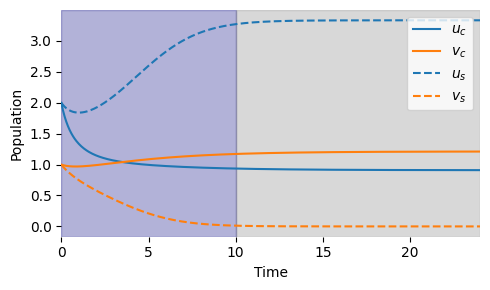

In [6]:
#Funktionen für das Lösen der DGL 
# def ode_model(q, t, r, a1, a2, b1, b2, e0,f0, e1,f1, e2,f2, e3,f3, e4,f4):
def ode_model(q, t, r, a1, a2, b1, b2):
    """
    Reference https://www.idmod.org/docs/hiv/model-seir.html
    """
    u, v =q
    
    # w/o higher order terms
    dudt = u*(1-a1*u- a2*v) 
    dvdt = r*v*(1-b1*u-b2*v)
    
    return [dudt, dvdt]

def ode_solver(t, initial_conditions, params):
    initu, initv = initial_conditions
    r, a1, a2, b1, b2 = params
    # r, a1, a2, b1, b2, e0,f0, e1,f1, e2,f2, e3,f3, e4,f4 = params
    res = odeint(ode_model, [initu, initv], t, args=(r, a1, a2, b1, b2))
    # res = odeint(ode_model, [initu, initv], t, args=(r, a1, a2, b1, b2, e0,f0, e1,f1, e2,f2, e3,f3, e4,f4)) #odeint from scipy.integrate
    return res

def solveDGL(initu, initv, r, a1, a2, b1, b2, tend):
# def solveDGL(initu, initv, r, a1, a2, b1, b2, e0,f0, e1,f1, e2,f2, e3,f3, e4,f4, tend):
    initial_conditions = [initu, initv]
    params = [r, a1, a2, b1, b2]
    # params = [r, a1, a2, b1, b2, e0,f0, e1,f1, e2,f2, e3,f3, e4,f4]
    tspan = np.arange(0, tend, 0.1)
    sol = ode_solver(tspan, initial_conditions, params)
    u,v = sol[:, 0], sol[:, 1]
    
    plt.plot(tspan, u)
    plt.plot(tspan, v)
    plt.show()



initial_conditions= [2,1]
# params = [0.5, 0.3, 0.6, 0.7, 0.3, 0,0, 0,0 ,0,0, 0,0, 0,0]
params = [0.5, 0.3, 0.6, 0.7, 0.3]
tTrain = np.linspace(0,24,500)
sol = ode_solver(tTrain, initial_conditions, params) # Lösen der DGL
uTrain,vTrain = sol[:, 0], sol[:, 1]


# params = [0.5, 0.7, 0.3, 0.3, 0.6, 0,0, 0,0 ,0,0, 0,0, 0,0]
params = [0.5, 0.7, 0.3, 0.3, 0.6]
tTrain = np.linspace(0,24,500)
initial_conditions = [2,1]
sol2 = ode_solver(tTrain, initial_conditions, params) # Lösen der DGL
uTrain2,vTrain2 = sol2[:, 0], sol2[:, 1]



# plot

fig, ax = plt.subplots(figsize=(5, 3))

# Plot data 
ax.plot(tTrain, uTrain2, linestyle='-', color='C0', label=r'$u_{c}$')  
ax.plot(tTrain, vTrain2, linestyle='-', color='C1', label=r'$v_{c}$')  
ax.plot(tTrain, uTrain, linestyle='--', color='C0', label=r'$u_{s}$') 
ax.plot(tTrain, vTrain, linestyle='--', color='C1', label=r'$v_{s}$') 


# Set labels and title
ax.set_xlabel('Time', fontsize=10)
ax.set_ylabel('Population', fontsize=10)
# ax.set_title('Population Dynamics')

# Set the default background to white
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Set x-axis limits
plt.xlim(0, 24)

# Remove the plot's bounding box by hiding the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add shaded regions based on the timespan
plt.axvspan(0, 10, color='navy', alpha=0.3)
plt.axvspan(10, 24, color='grey', alpha=0.3)

# Add legend
# Add legend with more precise labels and better readability
ax.legend(loc='upper right', fontsize='medium', title_fontsize='medium', frameon=True)

# Show plot
# plt.show()

# save plot as compmodel.png
# plt.savefig('compmodel.png')
plt.tight_layout()